# Entrega 2 Proyecto Final – Primeros Análisis<br>
#### Integrantes:
- Daniel Cea
- Cristobal Strange
- Antonia Painen
- Aleksander Humenyi

### 2.1. Definición del Problema

En los últimos años, se ha registrado un notable incremento en los precios de las viviendas, lo que ha generado dificultades crecientes para que las personas puedan acceder a una propiedad. Esta situación ha llevado a que los potenciales compradores deban considerar más factores al momento de elegir una vivienda, con el fin de optimizar su inversión.

El objetivo de este proyecto es proporcionar herramientas que ayuden a quienes están interesados en adquirir una vivienda en la Región Metropolitana. Utilizando análisis de datos, se busca generar información valiosa que permita a los compradores tomar decisiones más informadas y maximizar el valor de su compra en un contexto de mercado con precios al alza.

En esta entrega del proyecto, nos enfocaremos en describir en detalle los datos disponibles, los cuales incluyen información sobre las viviendas en venta en la Región Metropolitana, y presentaremos un plan preliminar de análisis que será extendido en las fases siguientes. El análisis abarcará tanto características de ciertos patrones de precios, para identificar tendencias que puedan beneficiar a los futuros compradores.

##### *¿Qué estrategias pueden emplear los compradores para maximizar el valor de su compra de vivienda en un mercado con precios en alza?*



### 2.2. Impacto del Trabajo

Dado el constante aumento en los precios de las viviendas, resulta cada vez más crucial para los compradores tomar decisiones informadas al momento de adquirir una propiedad. El mercado inmobiliario actual presenta desafíos significativos, especialmente en áreas urbanas donde la oferta es limitada y la demanda sigue creciendo. Por ello, conocer los factores que influyen en los precios y analizar las características de las viviendas disponibles se vuelve esencial para maximizar el valor de la inversión. En este contexto, contar con información precisa y actualizada puede marcar la diferencia entre una compra exitosa y una que no satisfaga las expectativas a largo plazo.


### 2.3. Datos
Los datos que elegimos para el proyecto es sobre casas que se encuentran a la venta en la Región Metropolitana, estos datos fueron extraídos mediante web scraping a una página de publicación de viviendas en venta, [Chile Propiedades](https://chilepropiedades.cl), y los datos extraídos de la página los obtuvimos  [aquí.](https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023)

Este dataset es relevante para el análisis del mercado inmobiliario, ya que refleja características importantes para los compradores, como ubicación, precio, tamaño de las propiedades y cantidad de baños y habitaciones. Con esto tenemos una amplia gama de factores clave que influyen en los precios, permitiendo un análisis exhaustivo del comportamiento del mercado en un área de alta demanda y constante alza en los precios de vivienda.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("Data/2023-07-18 Propiedades Web Scrape.csv")
df = df[["Price_CLP","Comuna","Dorms","Baths","Built Area","Total Area","Parking","Ubicacion","Realtor"]]
df.head()

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
0,129884400,Lampa,3.0,2.0,68.0,221.0,1.0,AvenidaLaHacienda,Behouse
1,130000000,Buin,5.0,3.0,150.0,190.0,2.0,Villaseca,NaN
2,172998805,PuenteAlto,4.0,3.0,90.0,182.0,3.0,BarrioAustria,Bissac
3,135296250,Buin,3.0,2.0,85.0,175.0,1.0,ComercianteArmandoPérezCarrasco,Ambiento Propiedades
4,195000000,QuintaNormal,3.0,3.0,130.0,402.0,1.0,Hostos,Puntoinmobiliario.cl


In [2]:
df = pd.read_csv("Data/2023-07-18 Propiedades Web Scrape.csv")
df = df[["Price_CLP","Comuna","Dorms","Baths","Built Area","Total Area","Parking","Ubicacion","Realtor"]]

df = df[df["Price_CLP"].notna()]
df = df.sort_values(by="Built Area", ascending=False)
df["Price_CLP"] = df["Price_CLP"].map(lambda x:x / 1000000)

df.head()

,Price_CLP,Comuna,Dorms,Baths,Built Area,Total Area,Parking,Ubicacion,Realtor
1464,155.13970,Paine,NaN,NaN,50000000.0,5000.0,NaN,18deseptiemrecohuelquem,Corredores Asociados
313,257.96485,Paine,6.0,3.0,2710000.0,5400.0,5.0,Hermosaparcelaconpiscinaenpaine,Movahome Corredores Integrados
717,130.00000,Cerrillos,3.0,1.0,120000.0,300000.0,2.0,Av.LosCerrillos639,orietta alvarez lobos
2611,90.00000,Renca,3.0,2.0,100350.0,80980.0,1.0,CampañadeTacna1595,NaN
2228,2164.74000,SanJosédeMaipo,14.0,NaN,60000.0,60000.0,NaN,Casamaipo,Invictus Spa


<Axes: xlabel='Price_CLP', ylabel='Count'>

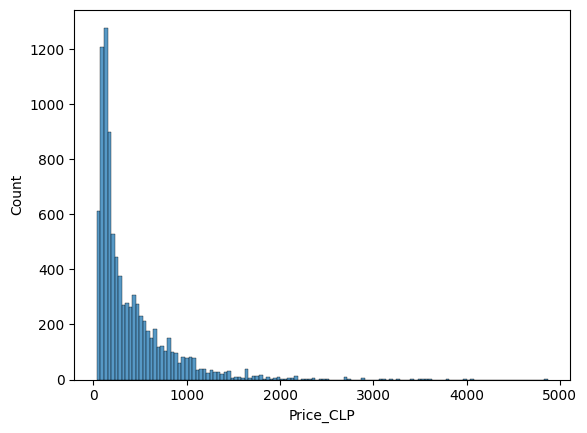

In [3]:
sns.histplot(df["Price_CLP"], stat="count")

<Axes: ylabel='Price_CLP'>

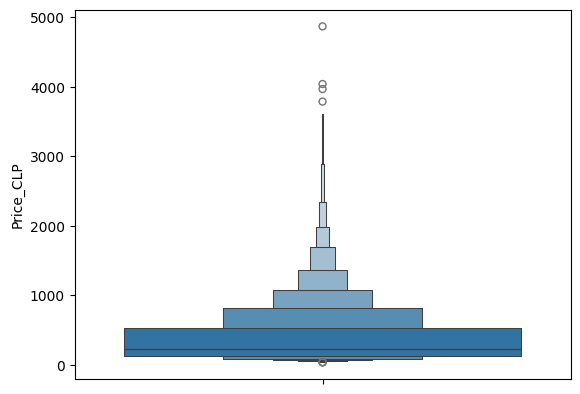

In [4]:
sns.boxenplot(df["Price_CLP"])

<Axes: ylabel='Dorms'>

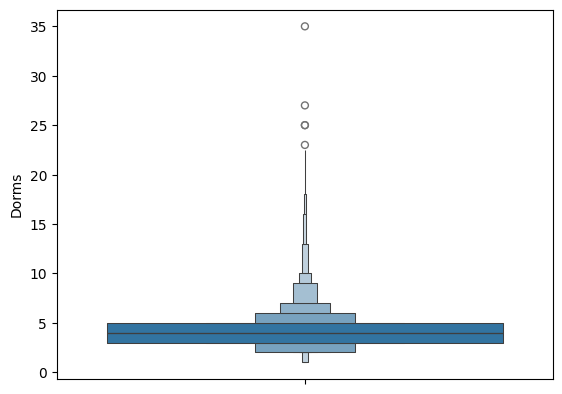

In [5]:
sns.boxenplot(df["Dorms"])

<Axes: ylabel='Baths'>

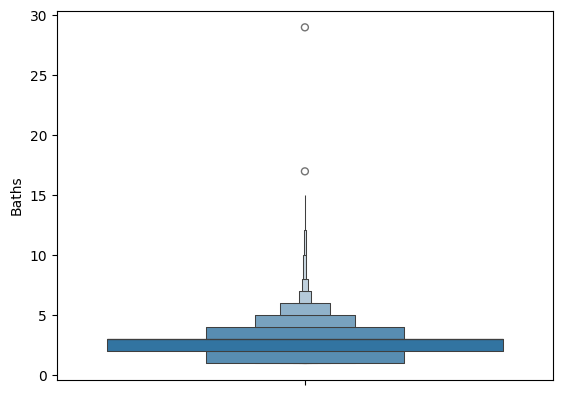

In [6]:
sns.boxenplot(df["Baths"])

<Axes: ylabel='Built Area'>

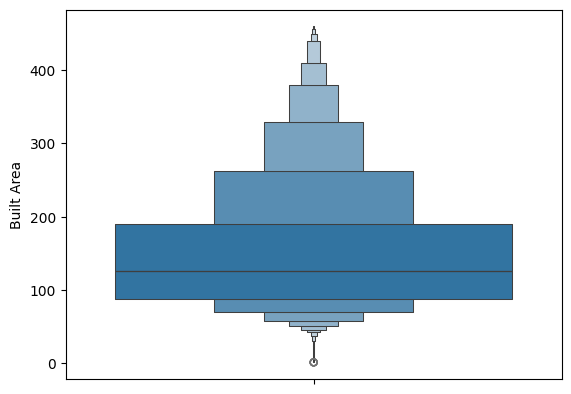

In [7]:
sns.boxenplot(df[df["Built Area"] < df["Built Area"].quantile(.95)]["Built Area"]) # Sin considerar unos outliers grandísimos que dejaban casi inútil el gráfico

<Axes: ylabel='Parking'>

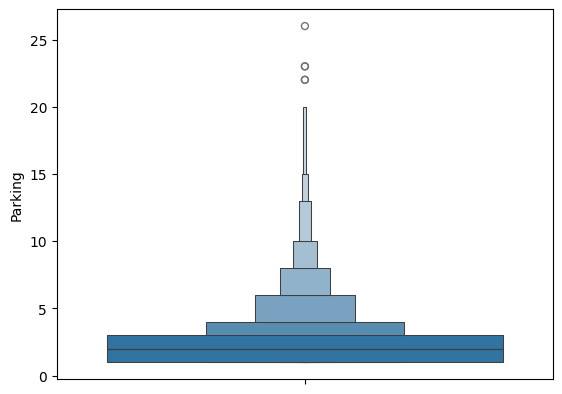

In [8]:
sns.boxenplot(df["Parking"])

In [9]:
df.describe()

,Price_CLP,Dorms,Baths,Built Area,Total Area,Parking
count,9291.000000,9202.000000,9138.000000,9.013000e+03,9057.000000,6371.000000
mean,392.513380,4.027059,2.749726,6.091603e+03,890.977145,2.682467
std,403.651503,1.661439,1.478629,5.274367e+05,11291.403141,2.221227
min,37.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000
25%,128.206727,3.000000,2.000000,9.000000e+01,134.000000,1.000000
50%,234.513500,4.000000,3.000000,1.310000e+02,230.000000,2.000000
75%,526.753400,5.000000,3.000000,2.090000e+02,480.000000,3.000000
max,4870.665000,35.000000,29.000000,5.000000e+07,720000.000000,26.000000


# 2.4

## ¿Qué información se tiene y no se tiene?

Tenemos Precio, dormitorio baño, aŕea construida y estacionamientos, pero sólo de casas, no de departamentos, además, de acuerdo con la documentación de los datos estas casas sólo son casas usadas, aunque probablemente no sea el caso de todas.

## ¿Cuántas observaciones hay?
Hay 9291 registros con un precio válido. 

## ¿Son los atributos independientes entre sí?
Los atributos no son independientes, ya que realmente el precio de una propiedad está muy relacionado con el indicador del área, y al tener más área lógicamente tendrá mas espacio para alojar más gente, que necesitará a su vez donde dormir y suplir sus necesidades.

### 2.5. Primera Respuesta al Problema o Pregunta

- ¿Por qué era adecuado el trabajo realizado para mi proyecto?

La finalidad del trabajo realizado es comprender el mercado inmobiliario actual en chile y poder tomar decisiones de manera informada. El analisis inicial permite visualizar de mejor manera ciertas variables y caracteristicas de las viviendas y con eso comprender tendencias y las ofertas existentes.
- ¿Qué limitaciones tiene mi análisis? ¿Cómo se podría mejorar o solventar algunas de esas limitaciones?

Las principales limitaciones vienen de la mano de los datos, ya que actuelmente se está trabajando con una base de datos, proveniente de una sola pagina web, por lo que puede haber información y ofertas de viviendas que estamos dejando de lado. También se puede perder fluctuaciones de precio a lo largo del tiempo, que es una variable clave al momento de toamr una decisión de inversión de gran magnitud. Finalmente no se están considerando factores como "servicios cercadnos", "áreas verdes", "accesibilidad", etc. 

La manera de mitigar estos problemas podrías ser, realizar analisis geoespacial, junto con complemntear los datos con otras paginas web.

- ¿Necesito más datos para mi proyecto?

De todas maneras el aumento de datos puede ser beneficioso para el proyecto, esto permite mejores correlaciones y aporta a una mejor comprensión del problema. Puede tener un lado negativo, que sería el aumento en el tiempo de analisis, pero siempre será más relevante un mejor y más profundo analisis, antes que uno superficial.

- ¿Necesito más análisis para mi proyecto?

Como comentamos anteriormente, se podría profundizar el analisis con un estudio zonal de las viviendas, junto con un estudio de las fluctuaciones de precios en el tiempo. 